In [2]:
#Import libraries
import imp
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

In [3]:
#Load libraries
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
#Load data
fileIris = "./iris.csv"
names = ['longitud-sepalo', 'ancho-sepalo', 'longitud-petalo', 'ancho-petalo', 'clase']
dataset = pandas.read_csv(fileIris, names=names)

In [6]:
#description
print(dataset.describe())

       longitud-sepalo  ancho-sepalo  longitud-petalo  ancho-petalo
count       150.000000    150.000000       150.000000    150.000000
mean          5.843333      3.054000         3.758667      1.198667
std           0.828066      0.433594         1.764420      0.763161
min           4.300000      2.000000         1.000000      0.100000
25%           5.100000      2.800000         1.600000      0.300000
50%           5.800000      3.000000         4.350000      1.300000
75%           6.400000      3.300000         5.100000      1.800000
max           7.900000      4.400000         6.900000      2.500000


In [7]:
#classDistribution
print(dataset.groupby('clase').size())

clase
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


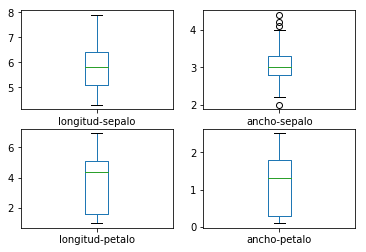

In [8]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

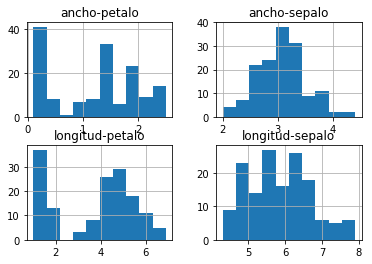

In [9]:
# histograms
dataset.hist()
plt.show()

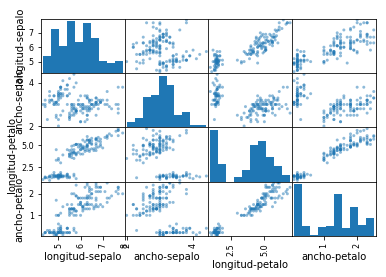

In [11]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()
#This suggests a high correlation and a predictable relationship between the analyzed features.

In [14]:
#Creating a validation dataset
arreglo = dataset.values
x = arreglo[:,0:4]
y = arreglo[:, 4]
validationSize = 0.20
seed = 7
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x, y, test_size=validationSize, random_state=seed)

In [15]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

It is necessary to build models on the data we have, so it's fundamental to test different algorithms on the data.
In this project, we're going to try logistic regression (LR), linear discriminant analysis (LDA), K-Nearest Neighbors (KNN), Classification and Regression Trees (CART), Gaussian Naive Bayes (NB), Support Vector Machines (SVM).

In [17]:
#Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [22]:
#Evaluating each model
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.


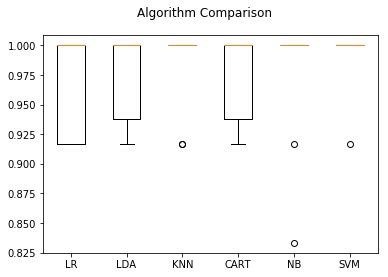

In [21]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Many samples achieve a 100% accuracy!

In [24]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predictions = knn.predict(x_validation)
#print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

